In [1]:
import numpy as np
import cv2
import torch
import torchvision
import os
import torch
# import torch.nn as nn
# import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import *
import torch.optim as optim

In [13]:
target_classes = [
'springboard diving',
'surfing water',
'swimming backstroke',
'swimming breast stroke',
'swimming butterfly stroke',
]
labels={}
count=0
for i in target_classes:
    labels[i]=count
    count+=1
frame_count=1
data=[]
tensor=[]
count=1
for i in os.listdir("final_train_dataset"):
    for j in os.listdir("final_train_dataset/"+i):
        file_path="final_train_dataset/"+i+"/"+j.split(".")[0]+"/"
        
        if len(os.listdir(file_path))%frame_count!=0:
            bal=len(os.listdir(file_path))%frame_count
        for ind in range(len(os.listdir(file_path))):
            
            if ind%frame_count==0 and ind!=0:
                data.append([tensor,labels[i]])
                tensor=[]
                tensor.append(file_path+str(ind+1)+".jpg")
            else:
                print(tensor)
                tensor.append(file_path+str(ind+1)+".jpg")

import csv  
f = open('final_train2d.csv', 'w')

# create the csv writer
writer = csv.writer(f)

# write a row to the csv file
writer.writerows(data)

# close the file
f.close()
#         string="videos/"+i+"/"+j+",1,"+str(len(os.listdir(file_path)))+","+str(labels[i])+"\n"
#         print(string)

[]
['final_train_dataset/surfing water/4PYllq54fo/300.jpg']
['final_train_dataset/surfing water/abk8N_ClHI/300.jpg']
['final_train_dataset/surfing water/gkS4EsnIFs/300.jpg']
['final_train_dataset/surfing water/gWTAB2PAQg/250.jpg']
['final_train_dataset/surfing water/Yo8aAfBd_4/300.jpg']
['final_train_dataset/surfing water/eVYw_857Eo/250.jpg']
['final_train_dataset/surfing water/3O1rqL5lrE/300.jpg']
['final_train_dataset/surfing water/bcRscXDrLk/250.jpg']
['final_train_dataset/surfing water/UhT8JDYwzg/299.jpg']
['final_train_dataset/surfing water/S4f_P07d5Y/296.jpg']
['final_train_dataset/surfing water/lLKs4lDSEs/299.jpg']
['final_train_dataset/surfing water/h2EebpPp2U/300.jpg']
['final_train_dataset/surfing water/7sAqcFBA9M/301.jpg']
['final_train_dataset/surfing water/dAWQCYyE2Q/300.jpg']
['final_train_dataset/surfing water/4UKD_ao5SY/145.jpg']
['final_train_dataset/surfing water/LbXMq4XJ3M/170.jpg']
['final_train_dataset/surfing water/QmdhSJcx6Q/150.jpg']
['final_train_dataset/surfin

['final_train_dataset/swimming backstroke/lUCfNAt54k/300.jpg']
['final_train_dataset/swimming backstroke/YmxWuF8CDY/251.jpg']
['final_train_dataset/swimming backstroke/vwjWQHlpYk/250.jpg']
['final_train_dataset/swimming backstroke/AJsW1W8JxI/300.jpg']
['final_train_dataset/swimming backstroke/yRXJAMONzE/300.jpg']
['final_train_dataset/swimming backstroke/jJrKCcoxoQ/300.jpg']
['final_train_dataset/swimming backstroke/ugCv3Xp4WQ/269.jpg']
['final_train_dataset/swimming backstroke/GD63mTNYO8/300.jpg']
['final_train_dataset/swimming backstroke/nYQ99iQAiE/300.jpg']
['final_train_dataset/swimming backstroke/23UItbupX4/300.jpg']
['final_train_dataset/swimming backstroke/iVP86dVQzo/201.jpg']
['final_train_dataset/swimming backstroke/saWFnycsmc/299.jpg']
['final_train_dataset/swimming backstroke/qySsP8Zt9Y/301.jpg']
['final_train_dataset/swimming backstroke/aMDT2_KljM/300.jpg']
['final_train_dataset/swimming backstroke/e8Kjl_bKgg/301.jpg']
['final_train_dataset/swimming backstroke/cAfxH1WnPo/30

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

from PIL import Image
frame_count=1

from matplotlib import pyplot as plt
def array_to_color(array, cmap="Oranges"):
    s_m = plt.cm.ScalarMappable(cmap=cmap)

    res=s_m.to_rgba(array)#[:,:-1]
    print(res.shape)
    print(res.reshape(16, 16, 16, 3))
    return s_m.to_rgba(array)[:,:-1]
def rgb_data_transform(data):
    x,y,c=cv2.imread(data[0]).shape
#     x,y,c=cv2.imread(data).shape
    frame_count=len(data)
    data_t =np.zeros((64,64,c,frame_count))
    print(data_t.shape)
    count=0
#     img=cv2.imread(data.strip())
#     print(img.shape)
#     data_t[:,:,:,count]=img
    for i in data:
#         print(i)
        img=Image.open(i.strip())
        img = np.asarray(img.resize([64,64]))
        print(img.shape)
        img=np.reshape(img,[64,64,c]) 
        break
#         print(img.shape)
#         data_t[:,:,:,count]=img
#         count+=1
#         data_t.append(array_to_color(img).reshape(16, 16, 16, 3))
#     return np.asarray(data_t, dtype=np.float32).reshape(16,16,3,7)
    print(img.shape)
    return img

import csv
train_x=[]
train_y=[]
with open('final_train2d.csv', mode='r') as csv_file:
    csv_reader = csv.reader(csv_file)
    line_count = 0
    for row in csv_reader:
#         print(row)
#         print(row[0])
        
        image_list=row[0].strip().replace("[","").replace("]","").replace("'","").split(",")
#         image_list=row[0].replace("[","")
#         print(image_list)
        if len(image_list)==frame_count:
            train_x.append(rgb_data_transform(image_list))
            print("Trainx length: ", len(train_x))
            train_y.append(int(row[1]))
print(len(train_x))
print(len(train_y))
np.save('train_X64_2D', train_x)
np.save('train_Y64_2D', train_y)

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17
(64, 64, 3, 1)
(64, 64,

(64, 64, 3)
(64, 64, 3)
Trainx length:  175
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  176
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  177
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  178
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  179
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  180
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  181
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  182
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  183
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  184
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  185
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  186
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  187
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  188
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  189
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  190
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  191
(64, 64, 3, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  315
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  316
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  317
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  318
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  319
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  320
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  321
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  322
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  323
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  324
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  325
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  326
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  327
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  328
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  329
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  330
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  331
(64, 64, 3, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  473
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  474
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  475
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  476
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  477
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  478
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  479
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  480
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  481
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  482
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  483
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  484
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  485
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  486
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  487
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  488
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  489
(64, 64, 3, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  655
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  656
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  657
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  658
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  659
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  660
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  661
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  662
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  663
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  664
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  665
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  666
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  667
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  668
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  669
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  670
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  671
(64, 64, 3, 

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  796
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  797
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  798
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  799
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  800
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  801
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  802
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  803
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  804
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  805
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  806
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  807
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  808
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  809
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  810
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  811
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8

(64, 64, 3)
(64, 64, 3)
Trainx length:  956
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  957
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  958
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  959
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  960
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  961
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  962
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  963
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  964
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  965
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  966
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  967
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  968
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  969
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  970
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  971
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  972
(64, 64, 3, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  1128
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1129
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1130
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1131
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1132
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1133
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1134
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1135
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1136
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1137
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1138
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1139
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1140
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1141
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1142
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1143
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1294
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1295
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1296
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1297
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1298
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1299
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1300
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1301
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1302
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1303
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1304
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1305
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1306
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1307
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1308
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1309
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
T

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1473
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1474
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1475
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1476
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1477
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1478
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1479
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1480
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1481
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1482
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1483
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1484
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1485
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1486
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1487
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1488
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
T

(64, 64, 3)
(64, 64, 3)
Trainx length:  1612
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1613
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1614
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1615
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1616
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1617
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1618
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1619
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1620
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1621
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1622
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1623
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1624
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1625
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1626
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1627
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1751
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1752
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1753
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1754
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1755
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1756
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1757
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1758
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1759
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1760
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1761
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1762
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1763
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1764
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1765
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1766
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
T

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1891
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1892
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1893
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1894
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1895
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1896
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1897
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1898
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1899
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1900
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1901
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1902
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1903
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1904
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1905
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  1906
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
T

(64, 64, 3)
(64, 64, 3)
Trainx length:  2030
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2031
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2032
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2033
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2034
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2035
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2036
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2037
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2038
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2039
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2040
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2041
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2042
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2043
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2044
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2045
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  

(64, 64, 3)
(64, 64, 3)
Trainx length:  2225
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2226
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2227
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2228
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2229
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2230
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2231
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2232
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2233
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2234
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2235
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2236
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2237
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2238
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2239
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2240
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2367
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2368
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2369
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2370
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2371
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2372
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2373
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2374
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2375
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2376
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2377
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2378
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2379
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2380
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2381
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2382
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
T

(64, 64, 3)
(64, 64, 3)
Trainx length:  2507
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2508
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2509
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2510
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2511
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2512
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2513
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2514
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2515
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2516
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2517
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2518
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2519
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2520
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2521
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2522
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  

(64, 64, 3)
(64, 64, 3)
Trainx length:  2644
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2645
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2646
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2647
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2648
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2649
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2650
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2651
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2652
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2653
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2654
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2655
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2656
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2657
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2658
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2659
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  

(64, 64, 3)
(64, 64, 3)
Trainx length:  2781
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2782
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2783
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2784
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2785
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2786
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2787
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2788
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2789
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2790
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2791
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2792
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2793
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2794
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2795
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2796
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  

(64, 64, 3)
(64, 64, 3)
Trainx length:  2920
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2921
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2922
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2923
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2924
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2925
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2926
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2927
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2928
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2929
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2930
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2931
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2932
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2933
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2934
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  2935
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3064
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3065
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3066
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3067
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3068
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3069
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3070
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3071
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3072
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3073
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3074
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3075
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3076
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3077
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3078
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3079
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
T

(64, 64, 3)
(64, 64, 3)
Trainx length:  3207
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3208
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3209
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3210
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3211
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3212
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3213
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3214
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3215
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3216
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3217
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3218
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3219
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3220
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3221
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3222
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3352
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3353
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3354
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3355
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3356
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3357
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3358
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3359
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3360
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3361
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3362
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3363
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3364
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3365
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3366
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3367
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
T

(64, 64, 3)
(64, 64, 3)
Trainx length:  3496
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3497
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3498
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3499
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3500
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3501
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3502
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3503
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3504
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3505
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3506
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3507
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3508
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3509
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3510
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3511
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  

(64, 64, 3)
(64, 64, 3)
Trainx length:  3633
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3634
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3635
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3636
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3637
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3638
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3639
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3640
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3641
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3642
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3643
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3644
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3645
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3646
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3647
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3648
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3790
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3791
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3792
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3793
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3794
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3795
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3796
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3797
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3798
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3799
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3800
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3801
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3802
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3803
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3804
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3805
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
T

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3943
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3944
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3945
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3946
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3947
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3948
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3949
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3950
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3951
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3952
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3953
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3954
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3955
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3956
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3957
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  3958
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
T

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4084
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4085
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4086
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4087
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4088
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4089
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4090
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4091
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4092
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4093
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4094
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4095
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4096
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4097
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4098
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4099
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
T

(64, 64, 3)
(64, 64, 3)
Trainx length:  4226
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4227
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4228
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4229
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4230
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4231
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4232
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4233
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4234
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4235
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4236
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4237
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4238
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4239
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4240
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4241
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  

(64, 64, 3)
(64, 64, 3)
Trainx length:  4366
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4367
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4368
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4369
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4370
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4371
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4372
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4373
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4374
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4375
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4376
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4377
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4378
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4379
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4380
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4381
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4506
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4507
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4508
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4509
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4510
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4511
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4512
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4513
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4514
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4515
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4516
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4517
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4518
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4519
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4520
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4521
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
T

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4645
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4646
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4647
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4648
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4649
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4650
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4651
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4652
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4653
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4654
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4655
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4656
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4657
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4658
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4659
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4660
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
T

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4787
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4788
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4789
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4790
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4791
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4792
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4793
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4794
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4795
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4796
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4797
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4798
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4799
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4800
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4801
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4802
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
T

(64, 64, 3)
(64, 64, 3)
Trainx length:  4928
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4929
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4930
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4931
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4932
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4933
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4934
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4935
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4936
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4937
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4938
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4939
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4940
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4941
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4942
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  4943
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5070
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5071
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5072
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5073
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5074
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5075
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5076
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5077
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5078
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5079
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5080
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5081
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5082
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5083
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5084
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5085
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
T

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5238
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5239
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5240
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5241
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5242
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5243
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5244
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5245
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5246
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5247
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5248
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5249
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5250
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5251
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5252
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5253
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
T

(64, 64, 3)
(64, 64, 3)
Trainx length:  5392
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5393
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5394
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5395
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5396
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5397
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5398
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5399
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5400
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5401
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5402
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5403
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5404
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5405
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5406
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5407
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  

(64, 64, 3)
(64, 64, 3)
Trainx length:  5530
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5531
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5532
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5533
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5534
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5535
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5536
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5537
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5538
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5539
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5540
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5541
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5542
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5543
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5544
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5545
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  

(64, 64, 3)
(64, 64, 3)
Trainx length:  5669
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5670
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5671
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5672
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5673
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5674
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5675
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5676
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5677
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5678
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5679
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5680
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5681
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5682
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5683
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5684
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5811
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5812
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5813
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5814
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5815
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5816
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5817
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5818
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5819
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5820
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5821
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5822
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5823
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5824
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5825
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5826
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
T

(64, 64, 3)
(64, 64, 3)
Trainx length:  5953
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5954
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5955
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5956
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5957
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5958
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5959
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5960
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5961
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5962
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5963
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5964
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5965
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5966
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5967
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  5968
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  

(64, 64, 3)
(64, 64, 3)
Trainx length:  6100
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6101
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6102
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6103
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6104
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6105
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6106
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6107
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6108
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6109
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6110
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6111
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6112
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6113
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6114
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6115
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  

(64, 64, 3)
(64, 64, 3)
Trainx length:  6255
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6256
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6257
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6258
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6259
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6260
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6261
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6262
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6263
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6264
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6265
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6266
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6267
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6268
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6269
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6270
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6414
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6415
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6416
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6417
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6418
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6419
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6420
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6421
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6422
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6423
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6424
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6425
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6426
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6427
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6428
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6429
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
T

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6559
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6560
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6561
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6562
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6563
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6564
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6565
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6566
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6567
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6568
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6569
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6570
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6571
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6572
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6573
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6574
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
T

(64, 64, 3)
(64, 64, 3)
Trainx length:  6703
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6704
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6705
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6706
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6707
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6708
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6709
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6710
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6711
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6712
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6713
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6714
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6715
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6716
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6717
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6718
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6856
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6857
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6858
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6859
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6860
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6861
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6862
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6863
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6864
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6865
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6866
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6867
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6868
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6869
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6870
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  6871
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
T

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7003
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7004
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7005
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7006
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7007
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7008
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7009
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7010
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7011
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7012
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7013
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7014
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7015
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7016
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7017
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7018
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
T

(64, 64, 3)
(64, 64, 3)
Trainx length:  7145
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7146
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7147
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7148
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7149
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7150
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7151
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7152
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7153
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7154
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7155
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7156
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7157
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7158
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7159
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7160
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7285
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7286
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7287
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7288
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7289
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7290
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7291
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7292
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7293
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7294
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7295
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7296
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7297
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7298
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7299
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7300
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
T

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7423
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7424
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7425
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7426
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7427
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7428
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7429
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7430
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7431
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7432
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7433
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7434
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7435
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7436
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7437
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7438
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
T

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7567
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7568
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7569
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7570
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7571
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7572
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7573
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7574
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7575
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7576
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7577
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7578
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7579
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7580
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7581
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7582
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
T

(64, 64, 3)
(64, 64, 3)
Trainx length:  7711
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7712
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7713
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7714
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7715
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7716
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7717
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7718
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7719
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7720
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7721
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7722
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7723
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7724
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7725
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7726
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  

(64, 64, 3)
(64, 64, 3)
Trainx length:  7849
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7850
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7851
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7852
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7853
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7854
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7855
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7856
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7857
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7858
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7859
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7860
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7861
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7862
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7863
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7864
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  

(64, 64, 3)
(64, 64, 3)
Trainx length:  7996
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7997
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7998
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  7999
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8000
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8001
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8002
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8003
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8004
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8005
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8006
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8007
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8008
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8009
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8010
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8011
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8153
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8154
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8155
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8156
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8157
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8158
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8159
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8160
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8161
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8162
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8163
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8164
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8165
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8166
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8167
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8168
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
T

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8297
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8298
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8299
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8300
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8301
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8302
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8303
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8304
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8305
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8306
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8307
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8308
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8309
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8310
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8311
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8312
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
T

(64, 64, 3)
(64, 64, 3)
Trainx length:  8435
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8436
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8437
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8438
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8439
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8440
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8441
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8442
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8443
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8444
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8445
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8446
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8447
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8448
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8449
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8450
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  

(64, 64, 3)
(64, 64, 3)
Trainx length:  8574
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8575
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8576
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8577
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8578
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8579
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8580
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8581
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8582
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8583
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8584
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8585
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8586
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8587
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8588
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8589
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  

(64, 64, 3)
(64, 64, 3)
Trainx length:  8714
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8715
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8716
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8717
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8718
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8719
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8720
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8721
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8722
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8723
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8724
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8725
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8726
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8727
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8728
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8729
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8855
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8856
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8857
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8858
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8859
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8860
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8861
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8862
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8863
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8864
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8865
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8866
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8867
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8868
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8869
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8870
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
T

(64, 64, 3)
(64, 64, 3)
Trainx length:  8995
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8996
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8997
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8998
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  8999
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9000
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9001
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9002
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9003
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9004
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9005
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9006
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9007
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9008
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9009
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9010
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  

(64, 64, 3)
(64, 64, 3)
Trainx length:  9135
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9136
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9137
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9138
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9139
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9140
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9141
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9142
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9143
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9144
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9145
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9146
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9147
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9148
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9149
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9150
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  

(64, 64, 3)
(64, 64, 3)
Trainx length:  9274
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9275
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9276
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9277
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9278
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9279
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9280
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9281
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9282
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9283
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9284
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9285
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9286
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9287
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9288
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9289
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  

(64, 64, 3)
(64, 64, 3)
Trainx length:  9414
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9415
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9416
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9417
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9418
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9419
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9420
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9421
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9422
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9423
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9424
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9425
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9426
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9427
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9428
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9429
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9560
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9561
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9562
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9563
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9564
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9565
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9566
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9567
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9568
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9569
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9570
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9571
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9572
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9573
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9574
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9575
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
T

(64, 64, 3)
(64, 64, 3)
Trainx length:  9709
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9710
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9711
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9712
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9713
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9714
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9715
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9716
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9717
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9718
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9719
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9720
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9721
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9722
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9723
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9724
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  

(64, 64, 3)
(64, 64, 3)
Trainx length:  9855
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9856
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9857
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9858
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9859
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9860
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9861
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9862
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9863
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9864
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9865
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9866
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9867
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9868
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9869
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9870
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9992
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9993
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9994
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9995
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9996
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9997
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9998
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  9999
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10000
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10001
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10002
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10003
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10004
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10005
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10006
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10007
(64, 64, 3, 1)
(64, 64, 3)
(64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  10131
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10132
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10133
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10134
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10135
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10136
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10137
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10138
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10139
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10140
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10141
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10142
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10143
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10144
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10145
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10146
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10267
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10268
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10269
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10270
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10271
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10272
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10273
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10274
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10275
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10276
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10277
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10278
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10279
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10280
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10281
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10282
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  10408
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10409
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10410
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10411
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10412
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10413
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10414
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10415
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10416
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10417
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10418
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10419
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10420
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10421
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10422
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10423
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10545
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10546
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10547
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10548
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10549
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10550
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10551
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10552
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10553
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10554
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10555
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10556
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10557
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10558
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10559
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10560
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  10687
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10688
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10689
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10690
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10691
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10692
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10693
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10694
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10695
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10696
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10697
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10698
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10699
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10700
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10701
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10702
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  10822
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10823
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10824
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10825
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10826
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10827
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10828
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10829
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10830
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10831
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10832
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10833
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10834
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10835
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10836
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10837
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  10962
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10963
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10964
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10965
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10966
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10967
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10968
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10969
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10970
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10971
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10972
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10973
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10974
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10975
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10976
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  10977
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11098
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11099
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11100
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11101
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11102
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11103
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11104
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11105
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11106
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11107
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11108
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11109
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11110
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11111
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11112
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11113
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11241
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11242
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11243
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11244
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11245
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11246
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11247
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11248
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11249
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11250
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11251
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11252
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11253
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11254
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11255
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11256
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11379
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11380
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11381
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11382
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11383
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11384
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11385
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11386
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11387
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11388
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11389
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11390
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11391
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11392
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11393
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11394
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  11519
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11520
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11521
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11522
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11523
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11524
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11525
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11526
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11527
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11528
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11529
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11530
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11531
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11532
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11533
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11534
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11656
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11657
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11658
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11659
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11660
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11661
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11662
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11663
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11664
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11665
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11666
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11667
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11668
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11669
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11670
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11671
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11819
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11820
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11821
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11822
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11823
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11824
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11825
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11826
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11827
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11828
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11829
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11830
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11831
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11832
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11833
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11834
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11964
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11965
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11966
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11967
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11968
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11969
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11970
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11971
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11972
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11973
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11974
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11975
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11976
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11977
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11978
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  11979
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12101
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12102
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12103
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12104
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12105
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12106
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12107
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12108
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12109
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12110
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12111
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12112
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12113
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12114
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12115
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12116
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  12236
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12237
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12238
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12239
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12240
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12241
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12242
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12243
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12244
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12245
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12246
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12247
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12248
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12249
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12250
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12251
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
Trainx length:  12396
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12397
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12398
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12399
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12400
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12401
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12402
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12403
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12404
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12405
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12406
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12407
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12408
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12409
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12410
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12411
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx lengt

(64, 64, 3)
(64, 64, 3)
Trainx length:  12547
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12548
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12549
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12550
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12551
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12552
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12553
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12554
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12555
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12556
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12557
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12558
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12559
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12560
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12561
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12562
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  12706
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12707
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12708
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12709
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12710
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12711
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12712
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12713
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12714
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12715
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12716
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12717
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12718
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12719
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12720
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12721
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  12841
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12842
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12843
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12844
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12845
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12846
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12847
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12848
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12849
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12850
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12851
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12852
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12853
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12854
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12855
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12856
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  12982
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12983
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12984
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12985
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12986
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12987
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12988
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12989
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12990
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12991
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12992
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12993
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12994
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12995
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12996
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  12997
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  13125
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13126
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13127
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13128
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13129
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13130
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13131
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13132
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13133
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13134
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13135
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13136
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13137
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13138
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13139
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13140
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  13274
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13275
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13276
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13277
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13278
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13279
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13280
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13281
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13282
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13283
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13284
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13285
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13286
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13287
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13288
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13289
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13414
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13415
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13416
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13417
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13418
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13419
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13420
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13421
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13422
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13423
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13424
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13425
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13426
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13427
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13428
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13429
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  13550
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13551
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13552
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13553
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13554
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13555
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13556
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13557
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13558
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13559
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13560
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13561
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13562
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13563
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13564
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13565
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  13712
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13713
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13714
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13715
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13716
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13717
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13718
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13719
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13720
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13721
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13722
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13723
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13724
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13725
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13726
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13727
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13872
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13873
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13874
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13875
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13876
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13877
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13878
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13879
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13880
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13881
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13882
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13883
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13884
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13885
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13886
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  13887
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14013
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14014
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14015
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14016
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14017
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14018
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14019
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14020
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14021
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14022
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14023
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14024
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14025
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14026
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14027
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14028
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  14177
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14178
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14179
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14180
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14181
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14182
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14183
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14184
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14185
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14186
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14187
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14188
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14189
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14190
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14191
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14192
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  14317
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14318
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14319
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14320
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14321
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14322
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14323
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14324
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14325
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14326
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14327
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14328
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14329
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14330
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14331
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14332
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  14458
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14459
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14460
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14461
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14462
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14463
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14464
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14465
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14466
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14467
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14468
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14469
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14470
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14471
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14472
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14473
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14613
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14614
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14615
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14616
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14617
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14618
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14619
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14620
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14621
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14622
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14623
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14624
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14625
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14626
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14627
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14628
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14760
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14761
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14762
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14763
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14764
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14765
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14766
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14767
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14768
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14769
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14770
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14771
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14772
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14773
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14774
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14775
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  14904
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14905
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14906
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14907
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14908
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14909
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14910
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14911
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14912
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14913
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14914
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14915
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14916
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14917
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14918
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  14919
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  15069
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15070
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15071
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15072
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15073
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15074
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15075
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15076
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15077
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15078
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15079
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15080
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15081
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15082
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15083
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15084
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  15211
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15212
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15213
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15214
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15215
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15216
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15217
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15218
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15219
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15220
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15221
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15222
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15223
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15224
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15225
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15226
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  15351
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15352
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15353
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15354
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15355
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15356
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15357
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15358
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15359
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15360
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15361
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15362
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15363
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15364
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15365
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15366
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  15503
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15504
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15505
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15506
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15507
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15508
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15509
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15510
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15511
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15512
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15513
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15514
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15515
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15516
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15517
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15518
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  15656
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15657
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15658
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15659
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15660
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15661
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15662
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15663
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15664
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15665
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15666
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15667
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15668
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15669
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15670
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15671
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  15807
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15808
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15809
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15810
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15811
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15812
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15813
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15814
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15815
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15816
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15817
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15818
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15819
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15820
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15821
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15822
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15962
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15963
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15964
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15965
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15966
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15967
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15968
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15969
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15970
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15971
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15972
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15973
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15974
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15975
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15976
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  15977
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16097
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16098
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16099
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16100
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16101
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16102
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16103
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16104
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16105
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16106
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16107
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16108
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16109
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16110
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16111
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16112
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  16233
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16234
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16235
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16236
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16237
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16238
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16239
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16240
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16241
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16242
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16243
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16244
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16245
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16246
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16247
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16248
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  16375
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16376
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16377
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16378
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16379
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16380
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16381
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16382
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16383
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16384
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16385
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16386
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16387
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16388
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16389
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16390
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16510
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16511
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16512
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16513
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16514
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16515
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16516
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16517
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16518
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16519
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16520
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16521
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16522
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16523
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16524
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16525
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  16656
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16657
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16658
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16659
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16660
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16661
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16662
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16663
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16664
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16665
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16666
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16667
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16668
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16669
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16670
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16671
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  16791
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16792
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16793
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16794
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16795
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16796
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16797
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16798
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16799
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16800
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16801
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16802
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16803
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16804
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16805
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16806
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  16928
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16929
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16930
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16931
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16932
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16933
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16934
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16935
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16936
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16937
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16938
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16939
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16940
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16941
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16942
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  16943
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17076
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17077
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17078
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17079
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17080
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17081
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17082
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17083
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17084
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17085
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17086
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17087
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17088
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17089
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17090
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17091
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17264
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17265
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17266
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17267
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17268
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17269
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17270
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17271
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17272
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17273
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17274
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17275
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17276
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17277
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17278
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17279
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17421
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17422
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17423
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17424
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17425
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17426
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17427
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17428
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17429
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17430
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17431
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17432
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17433
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17434
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17435
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17436
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  17556
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17557
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17558
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17559
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17560
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17561
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17562
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17563
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17564
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17565
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17566
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17567
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17568
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17569
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17570
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17571
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  17692
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17693
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17694
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17695
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17696
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17697
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17698
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17699
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17700
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17701
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17702
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17703
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17704
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17705
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17706
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17707
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  17831
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17832
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17833
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17834
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17835
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17836
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17837
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17838
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17839
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17840
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17841
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17842
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17843
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17844
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17845
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17846
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  17966
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17967
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17968
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17969
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17970
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17971
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17972
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17973
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17974
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17975
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17976
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17977
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17978
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17979
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17980
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  17981
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  18113
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18114
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18115
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18116
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18117
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18118
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18119
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18120
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18121
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18122
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18123
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18124
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18125
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18126
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18127
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18128
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  18268
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18269
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18270
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18271
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18272
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18273
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18274
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18275
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18276
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18277
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18278
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18279
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18280
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18281
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18282
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18283
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  18434
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18435
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18436
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18437
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18438
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18439
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18440
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18441
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18442
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18443
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18444
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18445
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18446
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18447
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18448
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18449
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  18589
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18590
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18591
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18592
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18593
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18594
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18595
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18596
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18597
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18598
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18599
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18600
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18601
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18602
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18603
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18604
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18739
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18740
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18741
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18742
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18743
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18744
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18745
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18746
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18747
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18748
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18749
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18750
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18751
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18752
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18753
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18754
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18908
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18909
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18910
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18911
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18912
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18913
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18914
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18915
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18916
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18917
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18918
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18919
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18920
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18921
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18922
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  18923
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  19051
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19052
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19053
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19054
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19055
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19056
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19057
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19058
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19059
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19060
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19061
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19062
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19063
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19064
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19065
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19066
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  19225
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19226
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19227
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19228
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19229
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19230
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19231
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19232
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19233
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19234
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19235
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19236
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19237
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19238
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19239
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19240
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  19363
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19364
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19365
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19366
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19367
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19368
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19369
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19370
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19371
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19372
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19373
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19374
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19375
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19376
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19377
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19378
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19500
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19501
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19502
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19503
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19504
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19505
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19506
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19507
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19508
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19509
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19510
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19511
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19512
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19513
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19514
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19515
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19636
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19637
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19638
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19639
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19640
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19641
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19642
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19643
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19644
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19645
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19646
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19647
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19648
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19649
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19650
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19651
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  19774
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19775
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19776
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19777
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19778
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19779
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19780
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19781
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19782
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19783
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19784
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19785
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19786
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19787
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19788
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19789
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19916
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19917
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19918
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19919
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19920
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19921
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19922
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19923
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19924
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19925
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19926
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19927
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19928
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19929
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19930
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  19931
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20053
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20054
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20055
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20056
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20057
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20058
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20059
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20060
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20061
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20062
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20063
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20064
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20065
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20066
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20067
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20068
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20196
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20197
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20198
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20199
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20200
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20201
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20202
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20203
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20204
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20205
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20206
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20207
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20208
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20209
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20210
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20211
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20336
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20337
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20338
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20339
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20340
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20341
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20342
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20343
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20344
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20345
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20346
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20347
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20348
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20349
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20350
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20351
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  20477
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20478
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20479
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20480
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20481
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20482
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20483
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20484
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20485
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20486
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20487
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20488
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20489
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20490
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20491
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20492
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  20612
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20613
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20614
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20615
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20616
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20617
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20618
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20619
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20620
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20621
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20622
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20623
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20624
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20625
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20626
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20627
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  20747
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20748
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20749
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20750
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20751
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20752
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20753
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20754
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20755
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20756
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20757
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20758
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20759
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20760
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20761
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20762
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  20882
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20883
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20884
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20885
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20886
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20887
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20888
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20889
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20890
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20891
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20892
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20893
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20894
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20895
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20896
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  20897
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21020
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21021
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21022
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21023
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21024
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21025
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21026
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21027
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21028
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21029
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21030
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21031
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21032
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21033
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21034
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21035
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21156
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21157
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21158
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21159
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21160
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21161
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21162
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21163
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21164
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21165
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21166
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21167
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21168
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21169
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21170
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21171
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  21291
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21292
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21293
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21294
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21295
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21296
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21297
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21298
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21299
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21300
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21301
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21302
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21303
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21304
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21305
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21306
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21433
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21434
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21435
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21436
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21437
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21438
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21439
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21440
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21441
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21442
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21443
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21444
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21445
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21446
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21447
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21448
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  21601
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21602
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21603
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21604
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21605
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21606
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21607
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21608
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21609
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21610
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21611
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21612
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21613
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21614
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21615
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21616
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  21793
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21794
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21795
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21796
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21797
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21798
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21799
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21800
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21801
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21802
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21803
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21804
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21805
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21806
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21807
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21808
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  21936
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21937
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21938
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21939
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21940
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21941
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21942
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21943
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21944
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21945
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21946
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21947
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21948
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21949
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21950
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  21951
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22083
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22084
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22085
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22086
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22087
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22088
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22089
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22090
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22091
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22092
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22093
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22094
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22095
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22096
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22097
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22098
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  22239
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22240
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22241
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22242
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22243
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22244
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22245
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22246
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22247
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22248
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22249
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22250
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22251
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22252
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22253
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22254
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  22395
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22396
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22397
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22398
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22399
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22400
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22401
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22402
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22403
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22404
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22405
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22406
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22407
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22408
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22409
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22410
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22537
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22538
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22539
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22540
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22541
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22542
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22543
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22544
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22545
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22546
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22547
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22548
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22549
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22550
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22551
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22552
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22677
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22678
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22679
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22680
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22681
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22682
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22683
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22684
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22685
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22686
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22687
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22688
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22689
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22690
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22691
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22692
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  22819
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22820
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22821
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22822
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22823
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22824
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22825
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22826
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22827
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22828
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22829
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22830
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22831
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22832
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22833
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22834
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  22959
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22960
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22961
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22962
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22963
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22964
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22965
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22966
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22967
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22968
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22969
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22970
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22971
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22972
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22973
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  22974
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23107
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23108
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23109
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23110
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23111
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23112
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23113
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23114
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23115
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23116
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23117
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23118
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23119
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23120
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23121
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23122
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23251
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23252
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23253
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23254
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23255
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23256
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23257
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23258
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23259
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23260
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23261
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23262
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23263
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23264
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23265
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23266
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  23389
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23390
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23391
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23392
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23393
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23394
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23395
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23396
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23397
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23398
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23399
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23400
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23401
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23402
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23403
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23404
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  23524
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23525
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23526
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23527
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23528
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23529
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23530
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23531
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23532
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23533
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23534
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23535
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23536
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23537
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23538
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23539
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23665
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23666
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23667
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23668
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23669
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23670
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23671
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23672
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23673
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23674
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23675
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23676
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23677
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23678
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23679
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23680
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23803
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23804
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23805
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23806
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23807
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23808
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23809
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23810
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23811
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23812
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23813
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23814
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23815
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23816
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23817
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23818
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  23945
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23946
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23947
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23948
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23949
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23950
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23951
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23952
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23953
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23954
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23955
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23956
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23957
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23958
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23959
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  23960
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24112
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24113
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24114
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24115
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24116
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24117
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24118
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24119
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24120
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24121
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24122
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24123
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24124
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24125
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24126
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24127
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  24254
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24255
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24256
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24257
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24258
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24259
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24260
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24261
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24262
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24263
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24264
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24265
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24266
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24267
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24268
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24269
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  24394
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24395
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24396
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24397
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24398
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24399
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24400
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24401
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24402
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24403
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24404
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24405
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24406
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24407
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24408
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24409
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  24530
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24531
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24532
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24533
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24534
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24535
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24536
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24537
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24538
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24539
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24540
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24541
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24542
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24543
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24544
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24545
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  24670
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24671
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24672
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24673
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24674
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24675
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24676
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24677
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24678
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24679
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24680
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24681
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24682
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24683
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24684
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24685
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  24811
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24812
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24813
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24814
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24815
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24816
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24817
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24818
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24819
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24820
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24821
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24822
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24823
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24824
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24825
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24826
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  24953
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24954
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24955
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24956
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24957
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24958
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24959
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24960
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24961
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24962
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24963
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24964
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24965
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24966
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24967
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  24968
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25090
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25091
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25092
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25093
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25094
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25095
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25096
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25097
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25098
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25099
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25100
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25101
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25102
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25103
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25104
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25105
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  25230
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25231
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25232
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25233
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25234
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25235
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25236
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25237
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25238
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25239
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25240
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25241
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25242
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25243
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25244
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25245
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  25371
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25372
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25373
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25374
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25375
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25376
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25377
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25378
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25379
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25380
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25381
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25382
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25383
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25384
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25385
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25386
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  25509
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25510
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25511
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25512
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25513
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25514
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25515
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25516
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25517
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25518
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25519
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25520
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25521
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25522
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25523
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25524
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  25651
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25652
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25653
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25654
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25655
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25656
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25657
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25658
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25659
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25660
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25661
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25662
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25663
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25664
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25665
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25666
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  25792
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25793
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25794
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25795
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25796
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25797
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25798
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25799
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25800
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25801
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25802
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25803
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25804
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25805
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25806
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25807
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  25930
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25931
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25932
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25933
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25934
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25935
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25936
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25937
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25938
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25939
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25940
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25941
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25942
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25943
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25944
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  25945
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  26069
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26070
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26071
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26072
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26073
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26074
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26075
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26076
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26077
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26078
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26079
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26080
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26081
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26082
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26083
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26084
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  26210
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26211
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26212
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26213
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26214
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26215
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26216
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26217
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26218
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26219
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26220
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26221
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26222
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26223
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26224
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26225
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  26347
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26348
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26349
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26350
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26351
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26352
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26353
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26354
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26355
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26356
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26357
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26358
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26359
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26360
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26361
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26362
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  26482
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26483
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26484
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26485
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26486
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26487
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26488
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26489
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26490
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26491
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26492
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26493
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26494
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26495
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26496
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26497
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  26618
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26619
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26620
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26621
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26622
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26623
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26624
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26625
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26626
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26627
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26628
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26629
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26630
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26631
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26632
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26633
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  26758
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26759
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26760
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26761
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26762
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26763
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26764
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26765
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26766
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26767
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26768
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26769
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26770
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26771
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26772
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26773
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26925
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26926
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26927
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26928
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26929
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26930
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26931
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26932
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26933
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26934
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26935
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26936
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26937
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26938
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26939
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  26940
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  27062
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27063
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27064
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27065
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27066
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27067
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27068
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27069
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27070
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27071
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27072
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27073
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27074
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27075
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27076
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27077
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  27199
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27200
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27201
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27202
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27203
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27204
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27205
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27206
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27207
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27208
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27209
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27210
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27211
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27212
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27213
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27214
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  27335
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27336
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27337
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27338
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27339
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27340
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27341
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27342
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27343
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27344
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27345
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27346
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27347
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27348
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27349
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27350
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27485
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27486
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27487
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27488
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27489
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27490
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27491
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27492
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27493
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27494
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27495
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27496
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27497
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27498
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27499
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27500
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  27650
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27651
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27652
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27653
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27654
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27655
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27656
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27657
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27658
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27659
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27660
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27661
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27662
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27663
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27664
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27665
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27802
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27803
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27804
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27805
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27806
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27807
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27808
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27809
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27810
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27811
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27812
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27813
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27814
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27815
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27816
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27817
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27937
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27938
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27939
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27940
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27941
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27942
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27943
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27944
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27945
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27946
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27947
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27948
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27949
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27950
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27951
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  27952
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  28078
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28079
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28080
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28081
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28082
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28083
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28084
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28085
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28086
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28087
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28088
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28089
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28090
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28091
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28092
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28093
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  28214
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28215
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28216
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28217
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28218
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28219
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28220
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28221
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28222
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28223
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28224
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28225
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28226
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28227
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28228
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28229
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  28388
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28389
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28390
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28391
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28392
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28393
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28394
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28395
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28396
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28397
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28398
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28399
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28400
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28401
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28402
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28403
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  28527
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28528
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28529
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28530
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28531
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28532
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28533
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28534
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28535
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28536
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28537
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28538
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28539
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28540
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28541
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28542
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  28664
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28665
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28666
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28667
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28668
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28669
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28670
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28671
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28672
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28673
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28674
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28675
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28676
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28677
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28678
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28679
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  28806
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28807
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28808
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28809
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28810
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28811
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28812
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28813
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28814
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28815
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28816
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28817
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28818
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28819
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28820
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28821
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  28948
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28949
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28950
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28951
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28952
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28953
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28954
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28955
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28956
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28957
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28958
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28959
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28960
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28961
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28962
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  28963
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  29088
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29089
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29090
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29091
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29092
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29093
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29094
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29095
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29096
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29097
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29098
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29099
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29100
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29101
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29102
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29103
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  29224
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29225
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29226
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29227
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29228
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29229
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29230
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29231
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29232
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29233
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29234
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29235
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29236
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29237
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29238
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29239
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29361
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29362
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29363
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29364
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29365
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29366
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29367
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29368
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29369
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29370
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29371
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29372
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29373
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29374
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29375
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29376
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  29501
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29502
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29503
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29504
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29505
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29506
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29507
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29508
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29509
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29510
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29511
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29512
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29513
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29514
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29515
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29516
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  29640
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29641
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29642
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29643
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29644
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29645
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29646
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29647
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29648
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29649
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29650
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29651
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29652
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29653
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29654
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29655
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  29778
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29779
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29780
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29781
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29782
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29783
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29784
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29785
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29786
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29787
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29788
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29789
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29790
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29791
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29792
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29793
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  29914
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29915
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29916
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29917
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29918
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29919
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29920
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29921
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29922
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29923
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29924
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29925
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29926
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29927
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29928
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  29929
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  30052
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30053
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30054
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30055
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30056
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30057
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30058
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30059
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30060
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30061
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30062
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30063
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30064
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30065
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30066
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30067
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30188
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30189
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30190
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30191
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30192
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30193
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30194
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30195
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30196
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30197
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30198
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30199
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30200
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30201
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30202
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30203
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  30324
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30325
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30326
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30327
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30328
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30329
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30330
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30331
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30332
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30333
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30334
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30335
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30336
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30337
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30338
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30339
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  30461
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30462
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30463
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30464
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30465
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30466
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30467
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30468
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30469
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30470
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30471
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30472
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30473
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30474
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30475
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30476
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30601
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30602
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30603
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30604
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30605
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30606
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30607
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30608
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30609
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30610
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30611
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30612
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30613
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30614
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30615
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30616
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  30740
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30741
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30742
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30743
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30744
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30745
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30746
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30747
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30748
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30749
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30750
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30751
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30752
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30753
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30754
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30755
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30875
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30876
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30877
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30878
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30879
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30880
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30881
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30882
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30883
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30884
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30885
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30886
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30887
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30888
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30889
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  30890
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  31013
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31014
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31015
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31016
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31017
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31018
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31019
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31020
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31021
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31022
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31023
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31024
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31025
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31026
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31027
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31028
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  31155
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31156
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31157
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31158
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31159
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31160
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31161
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31162
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31163
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31164
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31165
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31166
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31167
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31168
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31169
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31170
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  31290
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31291
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31292
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31293
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31294
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31295
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31296
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31297
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31298
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31299
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31300
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31301
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31302
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31303
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31304
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31305
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  31425
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31426
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31427
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31428
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31429
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31430
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31431
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31432
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31433
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31434
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31435
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31436
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31437
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31438
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31439
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31440
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  31562
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31563
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31564
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31565
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31566
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31567
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31568
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31569
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31570
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31571
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31572
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31573
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31574
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31575
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31576
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31577
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  31700
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31701
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31702
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31703
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31704
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31705
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31706
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31707
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31708
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31709
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31710
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31711
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31712
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31713
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31714
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31715
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  31841
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31842
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31843
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31844
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31845
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31846
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31847
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31848
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31849
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31850
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31851
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31852
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31853
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31854
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31855
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31856
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  31983
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31984
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31985
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31986
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31987
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31988
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31989
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31990
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31991
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31992
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31993
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31994
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31995
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31996
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31997
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  31998
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  32120
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32121
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32122
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32123
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32124
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32125
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32126
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32127
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32128
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32129
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32130
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32131
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32132
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32133
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32134
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32135
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32262
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32263
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32264
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32265
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32266
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32267
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32268
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32269
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32270
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32271
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32272
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32273
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32274
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32275
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32276
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32277
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32399
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32400
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32401
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32402
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32403
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32404
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32405
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32406
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32407
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32408
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32409
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32410
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32411
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32412
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32413
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32414
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32534
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32535
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32536
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32537
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32538
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32539
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32540
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32541
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32542
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32543
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32544
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32545
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32546
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32547
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32548
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32549
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  32670
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32671
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32672
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32673
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32674
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32675
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32676
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32677
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32678
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32679
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32680
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32681
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32682
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32683
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32684
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32685
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  32812
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32813
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32814
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32815
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32816
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32817
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32818
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32819
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32820
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32821
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32822
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32823
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32824
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32825
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32826
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32827
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  32950
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32951
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32952
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32953
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32954
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32955
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32956
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32957
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32958
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32959
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32960
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32961
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32962
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32963
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32964
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  32965
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  33112
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33113
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33114
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33115
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33116
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33117
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33118
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33119
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33120
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33121
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33122
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33123
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33124
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33125
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33126
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33127
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33252
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33253
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33254
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33255
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33256
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33257
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33258
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33259
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33260
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33261
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33262
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33263
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33264
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33265
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33266
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33267
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  33393
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33394
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33395
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33396
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33397
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33398
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33399
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33400
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33401
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33402
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33403
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33404
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33405
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33406
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33407
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33408
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  33530
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33531
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33532
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33533
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33534
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33535
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33536
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33537
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33538
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33539
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33540
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33541
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33542
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33543
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33544
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33545
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  33670
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33671
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33672
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33673
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33674
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33675
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33676
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33677
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33678
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33679
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33680
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33681
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33682
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33683
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33684
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33685
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33809
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33810
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33811
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33812
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33813
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33814
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33815
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33816
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33817
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33818
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33819
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33820
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33821
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33822
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33823
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33824
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33963
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33964
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33965
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33966
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33967
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33968
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33969
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33970
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33971
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33972
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33973
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33974
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33975
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33976
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33977
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  33978
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34114
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34115
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34116
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34117
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34118
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34119
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34120
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34121
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34122
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34123
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34124
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34125
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34126
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34127
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34128
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34129
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  34249
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34250
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34251
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34252
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34253
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34254
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34255
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34256
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34257
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34258
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34259
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34260
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34261
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34262
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34263
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34264
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  34384
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34385
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34386
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34387
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34388
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34389
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34390
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34391
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34392
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34393
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34394
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34395
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34396
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34397
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34398
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34399
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34522
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34523
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34524
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34525
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34526
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34527
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34528
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34529
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34530
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34531
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34532
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34533
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34534
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34535
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34536
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34537
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34657
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34658
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34659
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34660
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34661
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34662
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34663
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34664
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34665
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34666
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34667
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34668
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34669
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34670
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34671
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34672
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  34837
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34838
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34839
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34840
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34841
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34842
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34843
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34844
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34845
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34846
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34847
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34848
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34849
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34850
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34851
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34852
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34982
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34983
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34984
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34985
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34986
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34987
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34988
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34989
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34990
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34991
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34992
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34993
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34994
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34995
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34996
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  34997
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  35149
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35150
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35151
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35152
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35153
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35154
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35155
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35156
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35157
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35158
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35159
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35160
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35161
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35162
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35163
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35164
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  35287
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35288
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35289
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35290
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35291
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35292
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35293
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35294
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35295
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35296
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35297
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35298
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35299
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35300
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35301
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35302
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  35426
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35427
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35428
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35429
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35430
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35431
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35432
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35433
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35434
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35435
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35436
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35437
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35438
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35439
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35440
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35441
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  35572
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35573
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35574
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35575
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35576
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35577
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35578
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35579
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35580
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35581
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35582
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35583
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35584
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35585
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35586
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35587
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35732
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35733
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35734
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35735
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35736
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35737
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35738
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35739
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35740
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35741
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35742
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35743
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35744
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35745
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35746
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35747
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  35891
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35892
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35893
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35894
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35895
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35896
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35897
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35898
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35899
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35900
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35901
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35902
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35903
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35904
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35905
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  35906
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  36034
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36035
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36036
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36037
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36038
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36039
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36040
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36041
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36042
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36043
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36044
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36045
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36046
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36047
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36048
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36049
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  36174
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36175
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36176
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36177
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36178
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36179
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36180
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36181
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36182
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36183
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36184
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36185
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36186
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36187
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36188
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36189
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  36321
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36322
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36323
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36324
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36325
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36326
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36327
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36328
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36329
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36330
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36331
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36332
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36333
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36334
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36335
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36336
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36468
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36469
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36470
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36471
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36472
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36473
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36474
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36475
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36476
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36477
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36478
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36479
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36480
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36481
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36482
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36483
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  36608
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36609
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36610
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36611
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36612
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36613
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36614
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36615
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36616
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36617
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36618
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36619
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36620
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36621
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36622
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36623
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  36749
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36750
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36751
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36752
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36753
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36754
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36755
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36756
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36757
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36758
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36759
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36760
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36761
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36762
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36763
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36764
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  36891
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36892
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36893
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36894
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36895
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36896
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36897
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36898
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36899
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36900
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36901
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36902
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36903
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36904
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36905
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  36906
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37032
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37033
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37034
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37035
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37036
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37037
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37038
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37039
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37040
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37041
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37042
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37043
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37044
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37045
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37046
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37047
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  37181
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37182
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37183
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37184
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37185
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37186
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37187
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37188
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37189
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37190
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37191
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37192
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37193
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37194
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37195
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37196
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  37328
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37329
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37330
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37331
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37332
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37333
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37334
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37335
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37336
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37337
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37338
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37339
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37340
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37341
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37342
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37343
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  37464
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37465
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37466
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37467
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37468
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37469
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37470
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37471
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37472
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37473
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37474
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37475
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37476
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37477
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37478
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37479
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  37599
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37600
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37601
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37602
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37603
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37604
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37605
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37606
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37607
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37608
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37609
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37610
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37611
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37612
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37613
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37614
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  37739
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37740
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37741
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37742
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37743
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37744
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37745
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37746
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37747
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37748
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37749
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37750
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37751
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37752
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37753
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37754
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  37881
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37882
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37883
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37884
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37885
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37886
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37887
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37888
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37889
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37890
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37891
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37892
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37893
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37894
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37895
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  37896
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38024
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38025
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38026
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38027
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38028
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38029
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38030
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38031
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38032
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38033
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38034
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38035
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38036
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38037
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38038
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38039
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38181
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38182
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38183
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38184
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38185
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38186
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38187
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38188
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38189
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38190
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38191
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38192
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38193
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38194
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38195
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38196
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38337
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38338
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38339
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38340
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38341
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38342
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38343
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38344
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38345
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38346
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38347
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38348
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38349
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38350
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38351
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38352
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  38494
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38495
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38496
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38497
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38498
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38499
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38500
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38501
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38502
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38503
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38504
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38505
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38506
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38507
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38508
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38509
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  38629
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38630
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38631
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38632
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38633
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38634
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38635
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38636
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38637
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38638
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38639
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38640
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38641
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38642
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38643
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38644
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  38766
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38767
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38768
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38769
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38770
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38771
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38772
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38773
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38774
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38775
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38776
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38777
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38778
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38779
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38780
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38781
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38929
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38930
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38931
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38932
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38933
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38934
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38935
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38936
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38937
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38938
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38939
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38940
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38941
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38942
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38943
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  38944
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  39085
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39086
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39087
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39088
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39089
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39090
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39091
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39092
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39093
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39094
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39095
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39096
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39097
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39098
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39099
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39100
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39232
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39233
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39234
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39235
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39236
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39237
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39238
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39239
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39240
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39241
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39242
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39243
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39244
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39245
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39246
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39247
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39370
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39371
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39372
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39373
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39374
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39375
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39376
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39377
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39378
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39379
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39380
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39381
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39382
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39383
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39384
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39385
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  39505
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39506
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39507
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39508
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39509
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39510
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39511
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39512
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39513
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39514
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39515
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39516
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39517
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39518
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39519
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39520
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  39640
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39641
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39642
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39643
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39644
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39645
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39646
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39647
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39648
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39649
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39650
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39651
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39652
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39653
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39654
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39655
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39795
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39796
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39797
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39798
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39799
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39800
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39801
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39802
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39803
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39804
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39805
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39806
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39807
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39808
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39809
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39810
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39940
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39941
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39942
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39943
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39944
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39945
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39946
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39947
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39948
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39949
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39950
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39951
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39952
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39953
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39954
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  39955
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  40075
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40076
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40077
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40078
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40079
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40080
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40081
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40082
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40083
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40084
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40085
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40086
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40087
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40088
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40089
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40090
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  40215
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40216
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40217
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40218
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40219
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40220
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40221
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40222
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40223
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40224
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40225
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40226
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40227
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40228
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40229
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40230
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40367
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40368
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40369
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40370
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40371
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40372
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40373
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40374
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40375
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40376
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40377
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40378
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40379
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40380
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40381
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40382
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40510
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40511
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40512
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40513
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40514
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40515
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40516
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40517
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40518
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40519
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40520
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40521
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40522
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40523
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40524
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40525
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40651
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40652
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40653
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40654
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40655
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40656
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40657
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40658
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40659
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40660
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40661
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40662
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40663
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40664
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40665
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40666
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  40786
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40787
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40788
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40789
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40790
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40791
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40792
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40793
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40794
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40795
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40796
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40797
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40798
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40799
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40800
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40801
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  40926
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40927
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40928
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40929
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40930
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40931
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40932
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40933
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40934
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40935
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40936
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40937
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40938
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40939
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40940
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  40941
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41095
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41096
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41097
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41098
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41099
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41100
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41101
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41102
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41103
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41104
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41105
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41106
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41107
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41108
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41109
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41110
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  41237
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41238
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41239
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41240
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41241
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41242
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41243
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41244
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41245
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41246
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41247
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41248
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41249
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41250
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41251
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41252
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  41380
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41381
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41382
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41383
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41384
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41385
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41386
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41387
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41388
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41389
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41390
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41391
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41392
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41393
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41394
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41395
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41522
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41523
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41524
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41525
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41526
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41527
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41528
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41529
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41530
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41531
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41532
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41533
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41534
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41535
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41536
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41537
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  41673
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41674
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41675
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41676
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41677
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41678
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41679
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41680
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41681
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41682
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41683
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41684
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41685
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41686
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41687
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41688
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41829
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41830
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41831
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41832
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41833
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41834
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41835
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41836
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41837
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41838
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41839
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41840
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41841
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41842
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41843
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41844
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41975
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41976
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41977
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41978
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41979
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41980
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41981
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41982
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41983
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41984
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41985
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41986
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41987
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41988
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41989
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  41990
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  42115
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42116
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42117
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42118
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42119
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42120
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42121
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42122
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42123
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42124
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42125
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42126
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42127
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42128
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42129
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42130
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  42250
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42251
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42252
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42253
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42254
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42255
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42256
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42257
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42258
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42259
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42260
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42261
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42262
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42263
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42264
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42265
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  42385
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42386
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42387
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42388
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42389
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42390
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42391
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42392
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42393
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42394
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42395
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42396
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42397
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42398
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42399
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42400
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  42525
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42526
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42527
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42528
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42529
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42530
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42531
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42532
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42533
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42534
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42535
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42536
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42537
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42538
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42539
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42540
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  42674
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42675
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42676
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42677
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42678
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42679
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42680
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42681
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42682
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42683
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42684
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42685
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42686
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42687
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42688
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42689
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  42860
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42861
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42862
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42863
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42864
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42865
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42866
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42867
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42868
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42869
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42870
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42871
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42872
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42873
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42874
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42875
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  42998
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  42999
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43000
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43001
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43002
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43003
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43004
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43005
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43006
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43007
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43008
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43009
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43010
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43011
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43012
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43013
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  43133
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43134
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43135
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43136
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43137
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43138
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43139
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43140
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43141
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43142
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43143
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43144
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43145
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43146
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43147
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43148
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43274
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43275
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43276
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43277
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43278
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43279
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43280
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43281
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43282
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43283
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43284
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43285
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43286
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43287
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43288
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43289
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  43412
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43413
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43414
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43415
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43416
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43417
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43418
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43419
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43420
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43421
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43422
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43423
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43424
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43425
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43426
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43427
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43547
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43548
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43549
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43550
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43551
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43552
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43553
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43554
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43555
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43556
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43557
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43558
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43559
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43560
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43561
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43562
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  43687
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43688
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43689
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43690
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43691
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43692
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43693
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43694
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43695
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43696
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43697
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43698
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43699
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43700
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43701
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43702
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  43827
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43828
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43829
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43830
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43831
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43832
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43833
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43834
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43835
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43836
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43837
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43838
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43839
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43840
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43841
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43842
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  43964
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43965
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43966
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43967
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43968
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43969
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43970
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43971
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43972
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43973
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43974
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43975
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43976
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43977
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43978
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  43979
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  44102
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44103
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44104
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44105
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44106
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44107
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44108
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44109
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44110
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44111
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44112
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44113
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44114
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44115
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44116
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44117
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44257
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44258
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44259
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44260
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44261
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44262
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44263
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44264
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44265
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44266
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44267
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44268
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44269
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44270
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44271
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44272
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  44403
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44404
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44405
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44406
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44407
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44408
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44409
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44410
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44411
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44412
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44413
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44414
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44415
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44416
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44417
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44418
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  44542
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44543
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44544
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44545
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44546
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44547
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44548
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44549
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44550
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44551
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44552
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44553
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44554
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44555
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44556
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44557
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  44686
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44687
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44688
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44689
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44690
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44691
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44692
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44693
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44694
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44695
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44696
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44697
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44698
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44699
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44700
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44701
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44823
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44824
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44825
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44826
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44827
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44828
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44829
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44830
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44831
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44832
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44833
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44834
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44835
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44836
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44837
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44838
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44960
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44961
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44962
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44963
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44964
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44965
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44966
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44967
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44968
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44969
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44970
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44971
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44972
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44973
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44974
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  44975
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45103
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45104
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45105
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45106
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45107
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45108
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45109
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45110
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45111
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45112
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45113
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45114
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45115
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45116
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45117
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45118
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  45245
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45246
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45247
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45248
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45249
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45250
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45251
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45252
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45253
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45254
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45255
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45256
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45257
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45258
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45259
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45260
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45396
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45397
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45398
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45399
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45400
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45401
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45402
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45403
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45404
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45405
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45406
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45407
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45408
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45409
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45410
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45411
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  45578
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45579
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45580
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45581
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45582
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45583
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45584
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45585
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45586
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45587
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45588
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45589
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45590
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45591
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45592
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45593
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  45736
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45737
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45738
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45739
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45740
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45741
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45742
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45743
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45744
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45745
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45746
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45747
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45748
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45749
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45750
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45751
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45879
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45880
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45881
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45882
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45883
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45884
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45885
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45886
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45887
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45888
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45889
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45890
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45891
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45892
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45893
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  45894
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  46042
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46043
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46044
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46045
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46046
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46047
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46048
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46049
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46050
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46051
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46052
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46053
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46054
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46055
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46056
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46057
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  46181
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46182
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46183
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46184
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46185
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46186
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46187
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46188
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46189
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46190
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46191
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46192
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46193
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46194
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46195
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46196
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46317
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46318
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46319
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46320
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46321
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46322
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46323
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46324
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46325
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46326
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46327
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46328
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46329
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46330
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46331
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46332
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  46459
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46460
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46461
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46462
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46463
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46464
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46465
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46466
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46467
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46468
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46469
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46470
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46471
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46472
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46473
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46474
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  46609
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46610
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46611
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46612
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46613
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46614
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46615
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46616
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46617
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46618
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46619
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46620
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46621
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46622
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46623
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46624
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  46757
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46758
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46759
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46760
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46761
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46762
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46763
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46764
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46765
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46766
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46767
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46768
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46769
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46770
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46771
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46772
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  46917
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46918
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46919
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46920
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46921
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46922
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46923
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46924
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46925
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46926
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46927
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46928
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46929
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46930
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46931
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  46932
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47059
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47060
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47061
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47062
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47063
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47064
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47065
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47066
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47067
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47068
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47069
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47070
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47071
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47072
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47073
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47074
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  47201
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47202
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47203
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47204
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47205
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47206
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47207
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47208
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47209
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47210
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47211
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47212
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47213
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47214
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47215
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47216
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  47338
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47339
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47340
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47341
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47342
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47343
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47344
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47345
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47346
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47347
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47348
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47349
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47350
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47351
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47352
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47353
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47475
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47476
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47477
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47478
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47479
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47480
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47481
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47482
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47483
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47484
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47485
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47486
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47487
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47488
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47489
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47490
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  47615
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47616
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47617
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47618
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47619
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47620
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47621
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47622
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47623
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47624
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47625
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47626
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47627
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47628
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47629
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47630
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  47753
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47754
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47755
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47756
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47757
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47758
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47759
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47760
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47761
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47762
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47763
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47764
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47765
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47766
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47767
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47768
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  47889
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47890
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47891
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47892
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47893
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47894
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47895
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47896
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47897
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47898
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47899
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47900
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47901
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47902
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47903
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  47904
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  48024
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48025
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48026
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48027
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48028
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48029
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48030
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48031
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48032
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48033
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48034
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48035
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48036
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48037
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48038
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48039
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  48179
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48180
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48181
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48182
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48183
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48184
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48185
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48186
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48187
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48188
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48189
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48190
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48191
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48192
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48193
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48194
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  48320
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48321
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48322
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48323
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48324
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48325
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48326
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48327
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48328
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48329
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48330
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48331
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48332
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48333
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48334
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48335
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  48468
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48469
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48470
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48471
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48472
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48473
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48474
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48475
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48476
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48477
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48478
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48479
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48480
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48481
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48482
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48483
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48617
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48618
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48619
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48620
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48621
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48622
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48623
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48624
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48625
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48626
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48627
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48628
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48629
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48630
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48631
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48632
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  48783
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48784
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48785
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48786
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48787
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48788
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48789
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48790
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48791
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48792
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48793
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48794
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48795
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48796
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48797
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48798
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48920
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48921
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48922
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48923
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48924
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48925
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48926
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48927
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48928
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48929
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48930
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48931
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48932
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48933
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48934
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  48935
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49055
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49056
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49057
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49058
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49059
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49060
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49061
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49062
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49063
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49064
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49065
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49066
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49067
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49068
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49069
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49070
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  49194
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49195
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49196
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49197
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49198
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49199
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49200
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49201
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49202
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49203
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49204
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49205
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49206
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49207
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49208
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49209
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  49332
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49333
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49334
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49335
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49336
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49337
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49338
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49339
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49340
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49341
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49342
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49343
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49344
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49345
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49346
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49347
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  49467
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49468
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49469
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49470
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49471
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49472
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49473
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49474
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49475
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49476
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49477
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49478
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49479
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49480
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49481
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49482
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  49611
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49612
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49613
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49614
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49615
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49616
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49617
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49618
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49619
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49620
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49621
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49622
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49623
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49624
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49625
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49626
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49752
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49753
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49754
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49755
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49756
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49757
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49758
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49759
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49760
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49761
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49762
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49763
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49764
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49765
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49766
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49767
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  49890
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49891
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49892
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49893
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49894
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49895
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49896
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49897
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49898
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49899
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49900
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49901
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49902
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49903
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49904
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  49905
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50031
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50032
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50033
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50034
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50035
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50036
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50037
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50038
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50039
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50040
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50041
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50042
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50043
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50044
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50045
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50046
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50166
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50167
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50168
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50169
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50170
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50171
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50172
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50173
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50174
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50175
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50176
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50177
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50178
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50179
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50180
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50181
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  50301
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50302
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50303
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50304
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50305
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50306
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50307
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50308
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50309
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50310
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50311
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50312
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50313
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50314
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50315
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50316
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50460
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50461
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50462
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50463
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50464
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50465
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50466
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50467
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50468
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50469
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50470
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50471
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50472
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50473
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50474
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50475
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  50597
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50598
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50599
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50600
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50601
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50602
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50603
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50604
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50605
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50606
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50607
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50608
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50609
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50610
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50611
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50612
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  50735
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50736
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50737
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50738
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50739
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50740
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50741
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50742
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50743
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50744
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50745
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50746
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50747
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50748
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50749
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50750
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50879
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50880
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50881
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50882
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50883
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50884
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50885
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50886
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50887
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50888
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50889
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50890
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50891
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50892
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50893
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  50894
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51021
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51022
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51023
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51024
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51025
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51026
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51027
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51028
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51029
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51030
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51031
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51032
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51033
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51034
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51035
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51036
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  51176
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51177
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51178
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51179
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51180
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51181
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51182
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51183
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51184
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51185
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51186
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51187
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51188
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51189
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51190
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51191
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  51323
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51324
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51325
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51326
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51327
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51328
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51329
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51330
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51331
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51332
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51333
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51334
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51335
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51336
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51337
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51338
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3)
(64, 64, 3)
Trainx length:  51487
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51488
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51489
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51490
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51491
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51492
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51493
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51494
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51495
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51496
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51497
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51498
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51499
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51500
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51501
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51502
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51629
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51630
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51631
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51632
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51633
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51634
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51635
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51636
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51637
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51638
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51639
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51640
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51641
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51642
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51643
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51644
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  51767
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51768
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51769
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51770
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51771
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51772
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51773
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51774
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51775
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51776
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51777
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51778
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51779
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51780
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51781
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51782
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51904
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51905
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51906
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51907
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51908
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51909
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51910
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51911
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51912
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51913
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51914
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51915
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51916
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51917
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51918
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  51919
(64, 64, 3, 1)
(64, 64, 

(64, 64, 3)
(64, 64, 3)
Trainx length:  52077
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  52078
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  52079
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  52080
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  52081
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  52082
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  52083
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  52084
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  52085
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  52086
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  52087
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  52088
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  52089
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  52090
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  52091
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)
Trainx length:  52092
(64, 64, 3, 1)
(64, 64, 3)
(64, 64, 3)


In [2]:
X_train= np.load('train_X64_2D.npy')
targets_train= np.load('train_Y64_2D.npy')

print(X_train.shape)


(52155, 64, 64, 3)


In [3]:
X_train= X_train.reshape(52155,3,64,64)
# train_x,train_y=data_trasform("train"))
train_x = torch.from_numpy(np.array(X_train)).float()
train_y = torch.from_numpy(np.array(targets_train)).long()
# test_x = torch.from_numpy(np.array(X_test)).float()
# test_y = torch.from_numpy(np.array(targets_test)).long()
# train_x = torch.from_numpy(train_x).float()
batch_size = 16 #We pick beforehand a batch_size that we will use for the training


# Pytorch train and test sets
train = torch.utils.data.TensorDataset(train_x,train_y)
# test = torch.utils.data.TensorDataset(test_x,test_y)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = True)
# test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)

In [4]:
num_classes = 5

# Create CNN Model
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 5)
        self.conv2 = nn.Conv2d(16, 32, 5)
        self.conv3 = nn.Conv2d(32, 128, 3)
        self.conv4 = nn.Conv2d(64, 128, 5)
        self.fc1 = nn.Linear(128, 256)
        self.fc2 = nn.Linear(256, num_classes)
        self.pool = nn.MaxPool2d(2, 2)
        self.batch=nn.BatchNorm1d(256)
        self.drop=nn.Dropout(p=0.15) 
        
    def forward(self, x):
#         print(x.shape)
        x = self.pool(F.relu(self.conv1(x)))
#         print(x.shape)
        x = self.pool(F.relu(self.conv2(x)))
#         print(x.shape)
        x = self.pool(F.relu(self.conv3(x)))
#         print(x.shape)
#         x = self.pool(F.relu(self.conv4(x)))
#         print(x.shape)
        bs, _, _, _ = x.shape
        x = F.adaptive_avg_pool2d(x, 1).reshape(bs, -1)
        x = F.relu(self.batch(self.fc1(x)))
        x = self.drop(x)
        x = self.fc2(x)
        
        

        return x

#Definition of hyperparameters
n_iters = 10000
num_epochs = n_iters / (len(train_x) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

# Create CNN
model = CNNModel()
#model.cuda()
print(model)


3
CNNModel(
  (conv1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(32, 128, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=128, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=5, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


In [5]:
## Loss and optimizer
learning_rate = 1e-4 #I picked this because it seems to be the most used by experts
load_model = True
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr= learning_rate) #Adam seems to be the most popular for deep learning
train_losses=[]
epochs=[]
for epoch in range(50): #I decided to train the model for 50 epochs
    loss_ep = 0
    epochs.append(epoch)
    for batch_idx, (data, targets) in enumerate(train_loader):
        data = data
        targets = targets
        ## Forward Pass
        optimizer.zero_grad()
        scores = model(data)
        loss = criterion(scores,targets)
        loss.backward()
        optimizer.step()
        loss_ep += loss.item()
    train_losses.append(loss_ep/len(train_loader))
    print(f"Loss in epoch {epoch} :::: {loss_ep/len(train_loader)}")

   

Loss in epoch 0 :::: 0.9565036675315693
Loss in epoch 1 :::: 0.498362326162633
Loss in epoch 2 :::: 0.3047192719039376
Loss in epoch 3 :::: 0.21510777983020282
Loss in epoch 4 :::: 0.1556263238727258
Loss in epoch 5 :::: 0.11410967370972289
Loss in epoch 6 :::: 0.09629875840762048
Loss in epoch 7 :::: 0.08202434651292231
Loss in epoch 8 :::: 0.07088403319238265
Loss in epoch 9 :::: 0.05888641092410608
Loss in epoch 10 :::: 0.054301342612669515
Loss in epoch 11 :::: 0.05116255792436612
Loss in epoch 12 :::: 0.043581852014875126
Loss in epoch 13 :::: 0.03894643456730195
Loss in epoch 14 :::: 0.034831482079083174
Loss in epoch 15 :::: 0.035494293841848996
Loss in epoch 16 :::: 0.030943036042322233
Loss in epoch 17 :::: 0.02967958971831242
Loss in epoch 18 :::: 0.028295121873182387
Loss in epoch 19 :::: 0.025061241507892806
Loss in epoch 20 :::: 0.024901565484874287
Loss in epoch 21 :::: 0.027504238226943936
Loss in epoch 22 :::: 0.024890704016998697
Loss in epoch 23 :::: 0.027114800683038

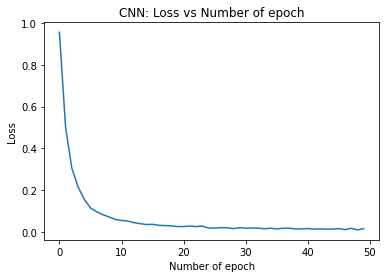

In [6]:
from matplotlib import pyplot as plt
# visualization loss 
iteration_list=[i for i in range(num_epochs)]
plt.plot(epochs,train_losses)
plt.xlabel("Number of epoch")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of epoch")
plt.show()



In [11]:
torch.save(model.state_dict(), "light2dcnn2_50.pth")

Model testing

In [20]:
target_classes = [
'springboard diving',
'surfing water',
'swimming backstroke',
'swimming breast stroke',
'swimming butterfly stroke',
]
labels={}
count=0
for i in target_classes:
    labels[i]=count
    count+=1
frame_count=1
data=[]
tensor=[]
count=1
for i in os.listdir("final_test_frames"):
    for j in os.listdir("final_test_frames/"+i):
        file_path="final_test_frames/"+i+"/"+j.split(".")[0]+"/"
        
        if len(os.listdir(file_path))%frame_count!=0:
            bal=len(os.listdir(file_path))%frame_count
        for ind in range(len(os.listdir(file_path))):
            
            if ind%frame_count==0 and ind!=0:
                data.append([tensor,labels[i]])
                tensor=[]
                tensor.append(file_path+str(ind+1)+".jpg")
            else:
                print(tensor)
                tensor.append(file_path+str(ind+1)+".jpg")

import csv  
f = open('final_test_frames2D.csv', 'w')

# create the csv writer
writer = csv.writer(f)

# write a row to the csv file
writer.writerows(data)

# close the file
f.close()
#         string="videos/"+i+"/"+j+",1,"+str(len(os.listdir(file_path)))+","+str(labels[i])+"\n"
#         print(string)

[]
['final_test_frames/surfing water/surfing_water_0kqTciFRiJE/299.jpg']
['final_test_frames/surfing water/surfing_water_3gM3pmIVNM0/300.jpg']
['final_test_frames/surfing water/surfing_water_--coBvtS-eQ/299.jpg']
['final_test_frames/surfing water/surfing_water_2ptdloHcTcs/240.jpg']
['final_test_frames/surfing water/surfing_water_3SbuecocgOA/239.jpg']
['final_test_frames/surfing water/surfing_water_5_vyScPYb0s/250.jpg']
['final_test_frames/surfing water/surfing_water_0znABGXo0Mc/300.jpg']
['final_test_frames/surfing water/surfing_water_cpWGM92DaQM/300.jpg']
['final_test_frames/surfing water/surfing_water_5MFNpo8cq48/240.jpg']
['final_test_frames/surfing water/surfing_water_3KlhF1e1Ykk/300.jpg']
['final_test_frames/surfing water/surfing_water_0T_PWMC44Dg/299.jpg']
['final_test_frames/surfing water/surfing_water_0F7D9hqf8Ng/300.jpg']
['final_test_frames/surfing water/surfing_water_3me_YJjq1k4/276.jpg']
['final_test_frames/surfing water/surfing_water_05FLJw6nljs/240.jpg']
['final_test_fram

In [21]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

from PIL import Image
frame_count=1

from matplotlib import pyplot as plt
def array_to_color(array, cmap="Oranges"):
    s_m = plt.cm.ScalarMappable(cmap=cmap)

    res=s_m.to_rgba(array)#[:,:-1]
    print(res.shape)
    print(res.reshape(16, 16, 16, 3))
    return s_m.to_rgba(array)[:,:-1]
def rgb_data_transform(data):
    x,y,c=cv2.imread(data[0]).shape
#     x,y,c=cv2.imread(data).shape
    frame_count=len(data)
    data_t =np.zeros((64,64,c,frame_count))
    print(data_t.shape)
    count=0
#     img=cv2.imread(data.strip())
#     print(img.shape)
#     data_t[:,:,:,count]=img
    for i in data:
#         print(i)
        img=Image.open(i.strip())
        img = np.asarray(img.resize([64,64]))
        print(img.shape)
        img=np.reshape(img,[64,64,c]) 
        break
#         print(img.shape)
#         data_t[:,:,:,count]=img
#         count+=1
#         data_t.append(array_to_color(img).reshape(16, 16, 16, 3))
#     return np.asarray(data_t, dtype=np.float32).reshape(16,16,3,7)
#     print(data_t.shape)
    return img

import csv
train_x=[]
train_y=[]
with open('final_test_frames2D.csv', mode='r') as csv_file:
    csv_reader = csv.reader(csv_file)
    line_count = 0
    for row in csv_reader:
#         print(row)
#         print(row[0])
        
        image_list=row[0].strip().replace("[","").replace("]","").replace("'","").split(",")
#         image_list=row[0].replace("[","")
        print(image_list)
        if len(image_list)==frame_count:
            train_x.append(rgb_data_transform(image_list))
            print("Testx length: ", len(train_x))
            train_y.append(int(row[1]))
print(len(train_x))
print(len(train_y))
np.save('test_X64_2D', train_x)
np.save('test_Y64_2D', train_y)

['final_test_frames/surfing water/surfing_water_0kqTciFRiJE/1.jpg']
(64, 64, 3, 1)
(64, 64, 3)
Testx length:  1
['final_test_frames/surfing water/surfing_water_0kqTciFRiJE/2.jpg']
(64, 64, 3, 1)
(64, 64, 3)
Testx length:  2
['final_test_frames/surfing water/surfing_water_0kqTciFRiJE/3.jpg']
(64, 64, 3, 1)
(64, 64, 3)
Testx length:  3
['final_test_frames/surfing water/surfing_water_0kqTciFRiJE/4.jpg']
(64, 64, 3, 1)
(64, 64, 3)
Testx length:  4
['final_test_frames/surfing water/surfing_water_0kqTciFRiJE/5.jpg']
(64, 64, 3, 1)
(64, 64, 3)
Testx length:  5
['final_test_frames/surfing water/surfing_water_0kqTciFRiJE/6.jpg']
(64, 64, 3, 1)
(64, 64, 3)
Testx length:  6
['final_test_frames/surfing water/surfing_water_0kqTciFRiJE/7.jpg']
(64, 64, 3, 1)
(64, 64, 3)
Testx length:  7
['final_test_frames/surfing water/surfing_water_0kqTciFRiJE/8.jpg']
(64, 64, 3, 1)
(64, 64, 3)
Testx length:  8
['final_test_frames/surfing water/surfing_water_0kqTciFRiJE/9.jpg']
(64, 64, 3, 1)
(64, 64, 3)
Testx len

(64, 64, 3)
Testx length:  74
['final_test_frames/surfing water/surfing_water_0kqTciFRiJE/75.jpg']
(64, 64, 3, 1)
(64, 64, 3)
Testx length:  75
['final_test_frames/surfing water/surfing_water_0kqTciFRiJE/76.jpg']
(64, 64, 3, 1)
(64, 64, 3)
Testx length:  76
['final_test_frames/surfing water/surfing_water_0kqTciFRiJE/77.jpg']
(64, 64, 3, 1)
(64, 64, 3)
Testx length:  77
['final_test_frames/surfing water/surfing_water_0kqTciFRiJE/78.jpg']
(64, 64, 3, 1)
(64, 64, 3)
Testx length:  78
['final_test_frames/surfing water/surfing_water_0kqTciFRiJE/79.jpg']
(64, 64, 3, 1)
(64, 64, 3)
Testx length:  79
['final_test_frames/surfing water/surfing_water_0kqTciFRiJE/80.jpg']
(64, 64, 3, 1)
(64, 64, 3)
Testx length:  80
['final_test_frames/surfing water/surfing_water_0kqTciFRiJE/81.jpg']
(64, 64, 3, 1)
(64, 64, 3)
Testx length:  81
['final_test_frames/surfing water/surfing_water_0kqTciFRiJE/82.jpg']
(64, 64, 3, 1)
(64, 64, 3)
Testx length:  82
['final_test_frames/surfing water/surfing_water_0kqTciFRiJ

KeyboardInterrupt: 

In [8]:
X_test= np.load('test_X64_2D.npy')
targets_test= np.load('test_Y64_2D.npy')

print(X_test.shape)


(20191, 64, 64, 3)


In [9]:
X_test= X_test.reshape(20191,3,64,64)
# train_x,train_y=data_trasform("train"))
# train_x = torch.from_numpy(np.array(X_train)).float()
# train_y = torch.from_numpy(np.array(targets_train)).long()
test_x = torch.from_numpy(np.array(X_test)).float()
test_y = torch.from_numpy(np.array(targets_test)).long()
# train_x = torch.from_numpy(train_x).float()
batch_size = 1 #We pick beforehand a batch_size that we will use for the training


# Pytorch train and test sets
# train = torch.utils.data.TensorDataset(train_x,train_y)
test = torch.utils.data.TensorDataset(test_x,test_y)

# data loader
# train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)

In [12]:
model = CNNModel()
model.load_state_dict(torch.load("light2dcnn2_50.pth")) #loads the trained model
model.eval()
test_loss=0
learning_rate = 1e-4 #I picked this because it seems to be the most used by experts
load_model = True
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr= learning_rate) #Adam seems to be the most popular for deep learning

num_correct = 0
num_samples = 0
for batch_idx, (data,targets) in enumerate(test_loader):
    data = data
    targets = targets
    ## Forward Pass
#     print(data.shape)
    scores = model(data)
    _, predictions = scores.max(1)
    test_loss +=criterion(scores,targets).item()
    num_correct += (predictions == targets).sum()
    num_samples += predictions.size(0)
print("Test loss :",test_loss/num_samples)
print(f"Got {num_correct} / {num_samples} with accuracy {float(num_correct) / float(num_samples) * 100:.2f}")

Test loss : 5.308288601393814
Got 3998 / 20191 with accuracy 19.80
